In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load your data (as you've done)
P_df = pd.read_csv('/Volumes/Samsung_T5/feature_matrix/chr_21.csv')    # Positive instances
U_df = pd.read_csv('/Users/kihoonkang/ncfVEP/chr_21_synthetic.csv')   # Unlabeled instances

#drop columns chr,start,end,annot
P_df = P_df.drop(columns=['chr','start','end','annot', 'Substitution'])
U_df = U_df.drop(columns=['chr','start','end','annot', 'Substitution'])

# Balance the datasets
min_length = min(len(P_df), len(U_df))
P_df = P_df.sample(min_length, random_state=42)
U_df = U_df.sample(min_length, random_state=42)

# Assign labels
P_df['label'] = 1
U_df['label'] = 0

# Combine datasets
data = pd.concat([P_df, U_df], ignore_index=True)
y = data['label']
X = data.drop(columns=['label'])


In [3]:
# Identify categorical columns
categorical_cols = ['+1', '-1', 'Ref', 'Alt']  # Replace with your actual categorical feature names

# Convert categorical columns to 'category' dtype
for col in categorical_cols:
    X[col] = X[col].astype('category')


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [5]:
# Parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    #eval metric is fraction of misclassified positives
    'eval_metric': 'error',
    'tree_method': 'hist',
    'enable_categorical': True
}

# Initialize the model
model = xgb.XGBClassifier(
    n_estimators=100,
    **params,
)


In [6]:
eval_set = [(X_train, y_train), (X_val, y_val)]

model.fit(
    X_train,
    y_train,
    eval_set=eval_set,
    verbose=True,
)


[0]	validation_0-error:0.33350	validation_1-error:0.33352
[1]	validation_0-error:0.33156	validation_1-error:0.33157
[2]	validation_0-error:0.31638	validation_1-error:0.31580
[3]	validation_0-error:0.29886	validation_1-error:0.29869
[4]	validation_0-error:0.29710	validation_1-error:0.29743
[5]	validation_0-error:0.29959	validation_1-error:0.29967
[6]	validation_0-error:0.29114	validation_1-error:0.29121
[7]	validation_0-error:0.28925	validation_1-error:0.28965
[8]	validation_0-error:0.27763	validation_1-error:0.27878
[9]	validation_0-error:0.27354	validation_1-error:0.27454
[10]	validation_0-error:0.23967	validation_1-error:0.24022
[11]	validation_0-error:0.23103	validation_1-error:0.23133
[12]	validation_0-error:0.22756	validation_1-error:0.22777
[13]	validation_0-error:0.18938	validation_1-error:0.19025
[14]	validation_0-error:0.17098	validation_1-error:0.17172
[15]	validation_0-error:0.16780	validation_1-error:0.16784
[16]	validation_0-error:0.14482	validation_1-error:0.14554
[17]	va

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='error', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

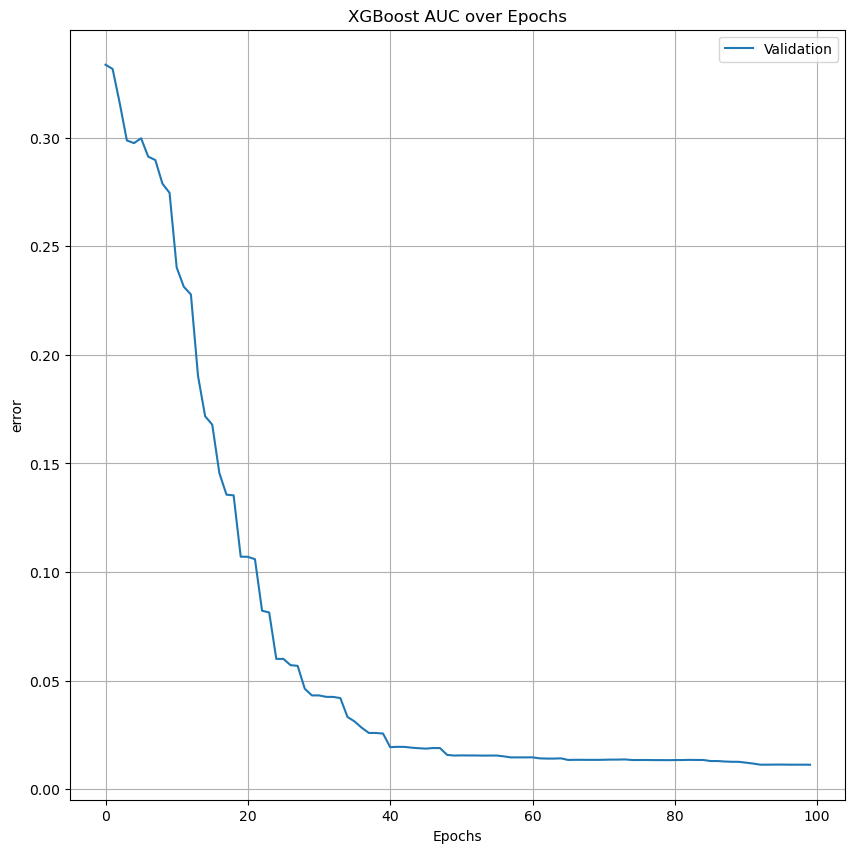

In [7]:
# Retrieve performance metrics
results = model.evals_result()

# Plotting
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

# Plot AUC
plt.figure(figsize=(10, 10))
plt.plot(x_axis, results['validation_1']['error'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('error')
plt.title('XGBoost AUC over Epochs')
plt.legend()
plt.grid(True)
plt.show()


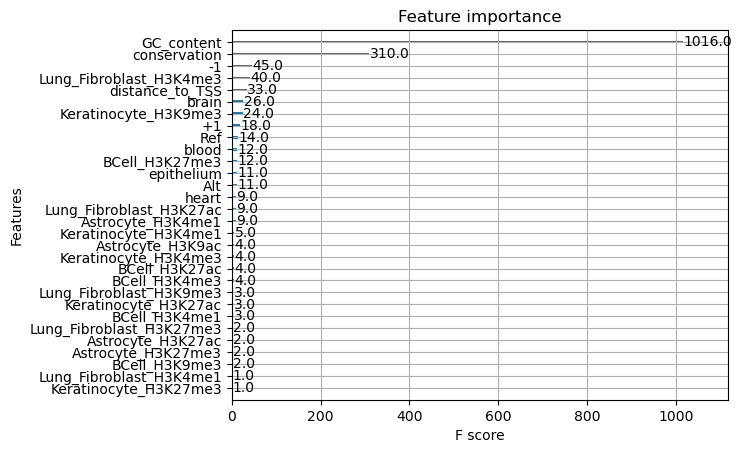

In [8]:
# Plot feature importance
xgb.plot_importance(model)
plt.show()

In [9]:
# load in unlabeled data to predict on 
U_df = pd.read_csv('/Users/kihoonkang/ncfVEP/chr21_synthetic_2.csv')   # Unlabeled instances

In [10]:
U_df

,chr,start,end,annot,Substitution,Ref,Alt,Astrocyte_H3K27me3,Lung_Fibroblast_H3K4me3,Lung_Fibroblast_H3K4me1,...,Keratinocyte_H3K4me3,BCell_H3K27ac,epithelium,BCell_H3K27me3,BCell_H3K9me3,distance_to_TSS,GC_content,+1,-1,conservation
0,chr21,417,419,chr21_418;._T:C,T:C,T,C,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5011381,0.0,N,N,0.0
1,chr21,815,817,chr21_816;._T:G,T:G,T,G,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5010983,0.0,N,N,0.0
2,chr21,882,884,chr21_883;._C:G,C:G,C,G,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5010916,0.0,N,N,0.0
3,chr21,1689,1691,chr21_1690;._A:C,A:C,A,C,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5010109,0.0,N,N,0.0
4,chr21,1702,1704,chr21_1703;._G:C,G:C,G,C,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5010096,0.0,N,N,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139753,chr21,46708645,46708647,chr21_46708646;._G:A,G:A,G,A,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,17882,0.0,N,N,0.0
139754,chr21,46709087,46709089,chr21_46709088;._A:G,A:G,A,G,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,18324,0.0,N,N,0.0
139755,chr21,46709493,46709495,chr21_46709494;._A:T,A:T,A,T,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,18730,0.0,N,N,0.0
139756,chr21,46709536,46709538,chr21_46709537;._G:A,G:A,G,A,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,18773,0.0,N,N,0.0


In [11]:
# drop columns chr,start,end,annot
U_df = U_df.drop(columns=['chr','start','end','annot', 'Substitution'])

# Identify categorical columns
categorical_cols = ['+1', '-1', 'Ref', 'Alt']  # Replace with your actual categorical feature names

# Convert categorical columns to 'category' dtype
for col in categorical_cols:
    U_df[col] = U_df[col].astype('category')

#match columns
U_df = U_df[X.columns]

# predict on unlabeled data
U_df['label'] = model.predict(U_df)

#print out 1's
print(U_df[U_df['label'] == 1])

       Ref Alt  BCell_H3K4me1  BCell_H3K4me3  BCell_H3K9me3  BCell_H3K27ac  \
16002    A   C            0.0            0.0            0.0            0.0   
16003    C   G            0.0            0.0            0.0            0.0   
16004    A   G            0.0            0.0            0.0            0.0   
16005    C   G            0.0            0.0            0.0            0.0   
16006    C   A            0.0            0.0            0.0            0.0   
...     ..  ..            ...            ...            ...            ...   
139716   G   A            0.0            0.0            0.0            0.0   
139717   A   G            0.0            0.0            0.0            0.0   
139718   A   C            0.0            0.0            0.0            0.0   
139719   T   C            0.0            0.0            0.0            0.0   
139720   G   A            0.0            0.0            0.0            0.0   

        BCell_H3K27me3  Keratinocyte_H3K4me3  Keratinocyte_H3K3

In [12]:
U_df = U_df[U_df['label'] == 1]
U_df = U_df.drop(columns=['label'])

#save predicted positives to csv
U_df.to_csv('/Users/kihoonkang/ncfVEP/chr_21_synthetic_2_PUL_pred.csv', index=False)

In [13]:
#train model that classifies observed vs unobserved 
# observed
P_df = pd.read_csv('/Volumes/Samsung_T5/feature_matrix/chr_21.csv')    # Positive instances

#drop columns chr,start,end,annot,Substitution
P_df = P_df.drop(columns=['chr','start','end','annot', 'Substitution'])

# Balance the datasets
min_length = min(len(P_df), len(U_df))
P_df = P_df.sample(min_length, random_state=42)
Un_df = U_df.sample(min_length, random_state=42)

In [14]:
#build xgboost classifier that distingushes observed vs unobserved
# Assign labels
P_df['label'] = 1
Un_df['label'] = 0

# Combine datasets
data = pd.concat([P_df, Un_df], ignore_index=True)

y = data['label']
X = data.drop(columns=['label'])

# Identify categorical columns
categorical_cols = ['+1', '-1', 'Ref', 'Alt']  # Replace with your actual categorical feature names

# Convert categorical columns to 'category' dtype
for col in categorical_cols:
    X[col] = X[col].astype('category')

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


0.561809292045277
AUC: 0.594430892018521


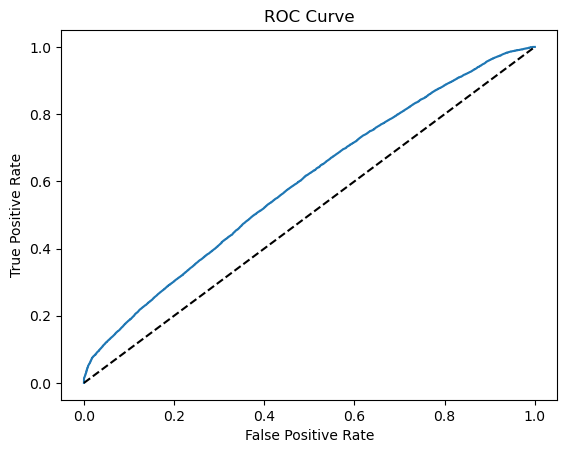

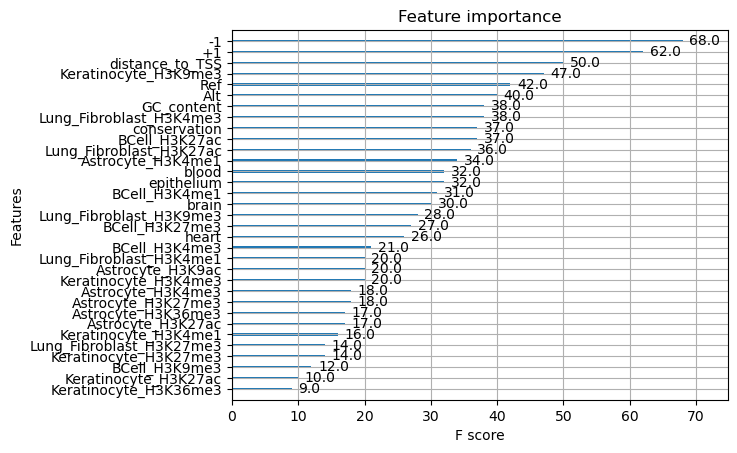

In [15]:
#train XGBoost model allow for categorial features
xgbc = xgb.XGBClassifier(n_estimators=30, enable_categorical=True)

xgbc.fit(X_train, y_train)

#predict on test set
y_pred = xgbc.predict(X_val)

#calculate accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val, y_pred))

#plot ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_val, xgbc.predict_proba(X_val)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
#plot y=x line
plt.plot([0, 1], [0, 1], 'k--')
#print auc score
print('AUC:', roc_auc_score(y_val, xgbc.predict_proba(X_val)[:,1]))
plt.show()

#plot feature importance
xgb.plot_importance(xgbc)
plt.show()

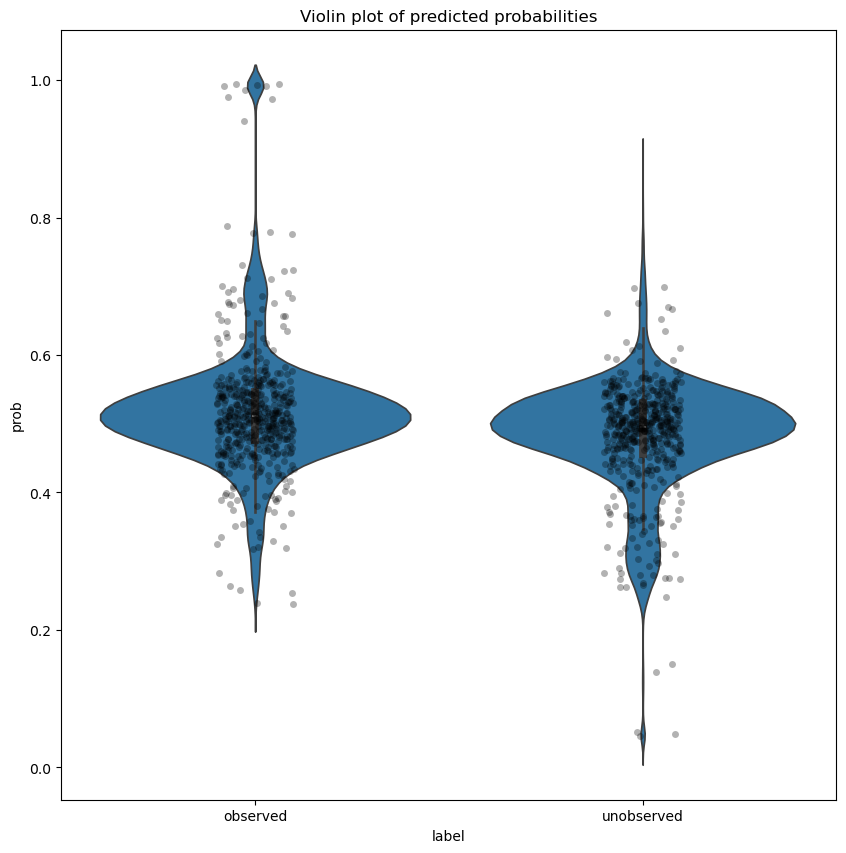

Ttest_indResult(statistic=42.468715730093656, pvalue=0.0)

In [16]:
plot_df = X_val.copy()

#add true labels to dataframe
plot_df['label'] = y_val

#change label to observed or unobserved
plot_df['label'] = plot_df['label'].replace({1: 'observed', 0: 'unobserved'})

#add prediction probabilities to dataframe
plot_df['prob'] = xgbc.predict_proba(X_val)[:,1]

#plot violin plot of probabilities for observed and unobserved
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.violinplot(x='label', y='prob', data=plot_df)
plt.title('Violin plot of predicted probabilities')
#plot jitter of sampled points
sampled = plot_df.sample(1000)
sns.stripplot(x='label', y='prob', data=sampled, color='black', alpha=0.3)
plt.show()

#calculate statistical difference
from scipy.stats import ttest_ind
observed = plot_df[plot_df['label'] == 'observed']['prob']
unobserved = plot_df[plot_df['label'] == 'unobserved']['prob']
ttest_ind(observed, unobserved)


In [28]:
#make bed files for pathogenic and benign
pathogenic = pd.read_csv('/Users/kihoonkang/Downloads/ncVar_pathogenic.tsv', sep='\t')
benign = pd.read_csv('/Users/kihoonkang/Downloads/ncVar_benign.tsv', sep='\t')

#remove ref or alt if it is more than 1 base
pathogenic = pathogenic[(pathogenic['ref'].str.len() == 1) & (pathogenic['alt'].str.len() == 1)]
benign = benign[(benign['ref'].str.len() == 1) & (benign['alt'].str.len() == 1)]

#id is chr22_10510061;rs2146084712_A:T
path_id = 'chr'+ pathogenic['chr'] + '_' + pathogenic['pos'].astype(str) + ';._' + pathogenic['ref'] + ':' + pathogenic['alt']
ben_id = 'chr'+benign['chr'] + '_' + benign['pos'].astype(str) + ';' + benign['x_ref']+ '_' + benign['ref'] + ':' + benign['alt']

pathogenic = pathogenic[['chr', 'pos', 'pos']]
benign = benign[['chr', 'pos', 'pos']]

#add 'chr' to chr column
pathogenic['chr'] = 'chr' + pathogenic['chr']
benign['chr'] = 'chr' + benign['chr']

pathogenic['id'] = path_id
benign['id'] = ben_id

#save as bed files
pathogenic.to_csv('/Volumes/Samsung_T5/ncVEP/VCFs/annotated/pathogenic.bed', sep='\t', index=False, header=False)
benign.to_csv('/Volumes/Samsung_T5/ncVEP/VCFs/annotated/benign.bed', sep='\t', index=False, header=False)

#order bed files
import os
os.system('sort -k1,1 -k2,2n /Volumes/Samsung_T5/ncVEP/VCFs/annotated/pathogenic.bed > /Volumes/Samsung_T5/ncVEP/VCFs/annotated/pathogenic_sorted.bed')
os.system('sort -k1,1 -k2,2n /Volumes/Samsung_T5/ncVEP/VCFs/annotated/benign.bed > /Volumes/Samsung_T5/ncVEP/VCFs/annotated/benign_sorted.bed')

0

label
benign        0.971195
pathogenic    0.955452
Name: predict_proba, dtype: float32


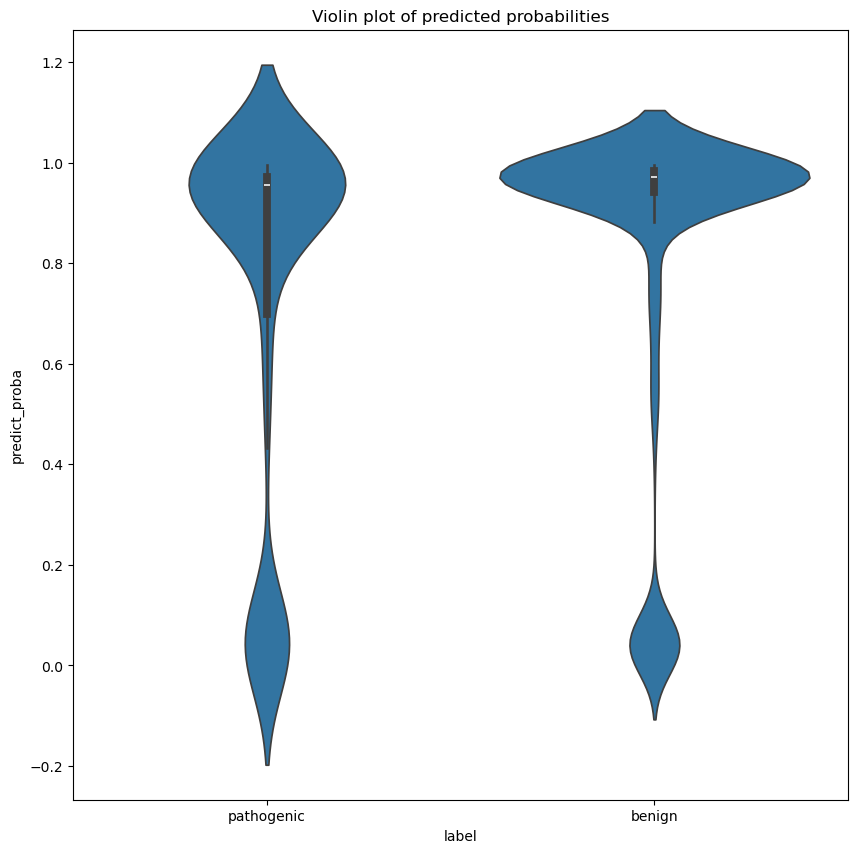

In [ ]:
#pass through clinically validated variants and common variants and see score
#load in clinically validated variants
pathogenic_feature_matrix = pd.read_csv('/Volumes/Samsung_T5/feature_matrix/pathogenic.csv')

#drop columns chr,start,end,annot,Substitution
pathogenic_feature_matrix = pathogenic_feature_matrix.drop(columns=['chr','start','end','annot', 'Substitution'])

# Identify categorical columns
categorical_cols = ['+1', '-1', 'Ref', 'Alt']  # Replace with your actual categorical feature names

# Convert categorical columns to 'category' dtype
for col in categorical_cols:
    pathogenic_feature_matrix[col] = pathogenic_feature_matrix[col].astype('category')

#order columns the same as model
pathogenic_feature_matrix = pathogenic_feature_matrix[X.columns]

#predict on pathogenic variants
pathogenic_feature_matrix['predict_proba'] = model.predict_proba(pathogenic_feature_matrix)[:,1]

pathogenic_feature_matrix['label'] = 'pathogenic'

#load in benign variants
benign_feature_matrix = pd.read_csv('/Volumes/Samsung_T5/feature_matrix/benign.csv')

#drop columns chr,start,end,annot,Substitution
benign_feature_matrix = benign_feature_matrix.drop(columns=['chr','start','end','annot', 'Substitution'])

# Identify categorical columns
categorical_cols = ['+1', '-1', 'Ref', 'Alt']  # Replace with your actual categorical feature names

# Convert categorical columns to 'category' dtype
for col in categorical_cols:
    benign_feature_matrix[col] = benign_feature_matrix[col].astype('category')

# order columns the same as model
benign_feature_matrix = benign_feature_matrix[X.columns]

#predict on common variants
benign_feature_matrix['predict_proba'] = model.predict_proba(benign_feature_matrix)[:,1]

benign_feature_matrix['label'] = 'benign'

total_data = pd.concat([pathogenic_feature_matrix, benign_feature_matrix], ignore_index=True)

#plot violin plot of probabilities for pathogenic and benign
plt.figure(figsize=(10, 10))
sns.violinplot(x='label', y='predict_proba', data=total_data)
plt.title('Violin plot of predicted probabilities')

#print median values
print(total_data.groupby('label')['predict_proba'].median())

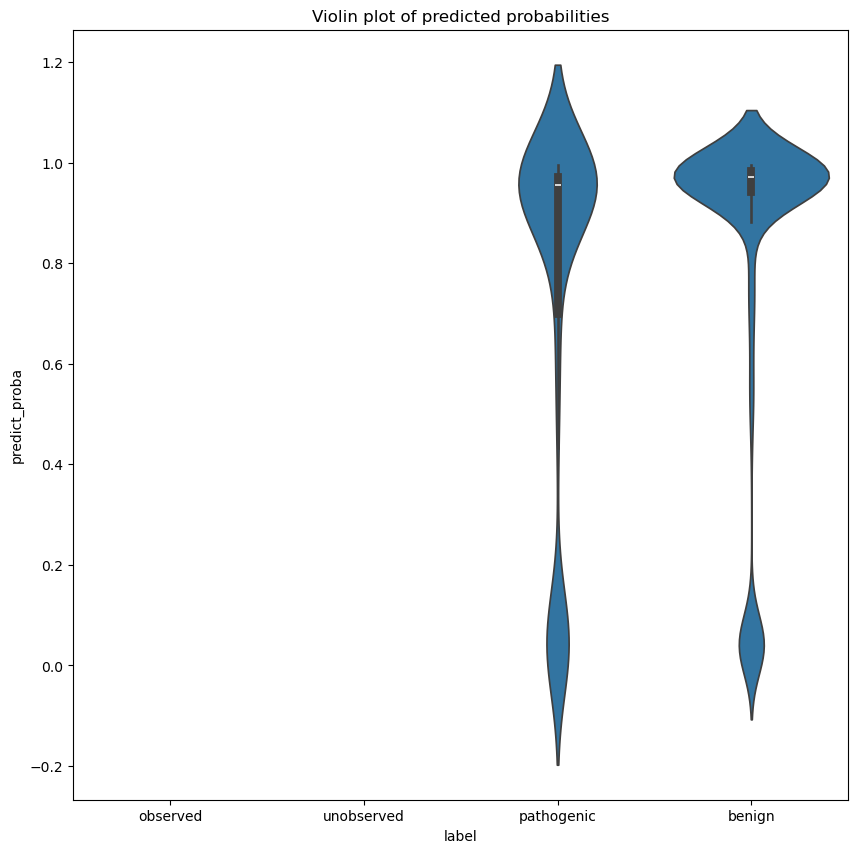

In [ ]:
#plot observed, unobserved, pathogenic, and benign all together in a box plot
plot_df = pd.concat([plot_df, total_data], ignore_index=True)

plt.figure(figsize=(10, 10))
sns.boxplot(x='label', y='predict_proba', data=plot_df)
plt.title('Box plot of predicted probabilities')
plt.show()